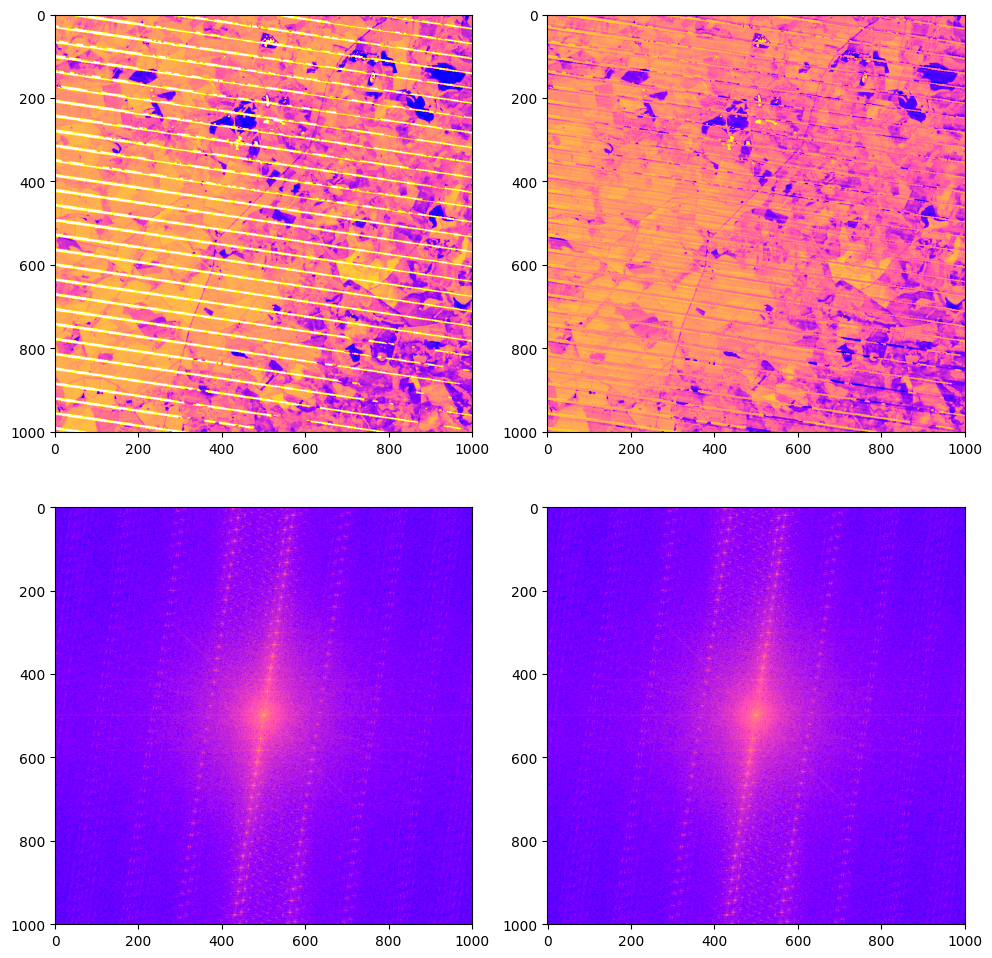

In [199]:
import numpy as np
test_image_with_nan = np.load('test_image_with_nan.npy')

test_image_with_nan[np.isnan(test_image_with_nan)] = 1e4
valid_index = np.argwhere(~np.isnan(test_image_with_nan))[0]  # Get the first non-NaN index
original_value = test_image_with_nan[tuple(valid_index)]

# 30 oscillation in the image
# wavelength = 1000/30 = 33

# Calculate Fourier transform of grating
ft = np.fft.ifftshift(test_image_with_nan)
ft = np.fft.fft2(ft, norm='ortho')
ft = np.fft.fftshift(ft)

ft_filt = ft.copy()
shift = 10
w1_y_m, w1_y_M, w1_x_m, w1_x_M = (493, 499, 525, 531)
w2_y_m, w2_y_M, w2_x_m, w2_x_M = (501, 507, 469, 475)
wc_y_m, wc_y_M, wc_x_m, wc_x_M = (480, 520, 480, 520)
# ft_filt[w1_x_m:w1_x_M, w1_y_m:w1_y_M] = ft_filt[w1_x_m+shift:w1_x_M+shift, w1_y_m+shift:w1_y_M+shift].copy()
# ft_filt[w2_x_m:w2_x_M, w2_y_m:w2_y_M] = ft_filt[w2_x_m+shift:w2_x_M+shift, w2_y_m+shift:w2_y_M+shift].copy()
abs_mean_bad = np.mean(np.abs(ft[w1_x_m:w1_x_M, w1_y_m:w1_y_M]))
mean_good = np.mean(np.abs(ft[w1_x_m+shift:w1_x_M+shift, w1_y_m+shift:w1_y_M+shift]))

indices_to_replace = np.argwhere(np.abs(ft_filt) > abs_mean_bad)
complement_mask = np.abs(ft_filt) <= abs_mean_bad
for index in indices_to_replace:
    y, x = index[0], index[1]
    comp_indices = np.argwhere(complement_mask)
    if comp_indices.size > 0:
        distances = np.sqrt((comp_indices[:, 0] - y) ** 2 + (comp_indices[:, 1] - x) ** 2)
        nearest_index = comp_indices[np.argmin(distances)]  # Get the nearest index
        ft_filt[y, x] = ft_filt[nearest_index[0], nearest_index[1]]

# ft_filt[np.abs(ft_filt) > abs_mean_bad] = mean_good
        
ft_filt[wc_x_m:wc_x_M, wc_y_m:wc_y_M] = ft[wc_x_m:wc_x_M, wc_y_m:wc_y_M].copy()

rec = np.fft.ifftshift(ft_filt)
rec = np.fft.ifft2(rec, norm='ortho')
rec = np.fft.fftshift(rec)
rec = np.real(rec)
# reconstructed_value = rec[tuple(valid_index)]
# rec *= original_value / reconstructed_value

# plt_1, plt_2, plt_3, plt_4 = (300, 700, 300, 700)
plt_1, plt_2, plt_3, plt_4 = (0, 1000, 0, 1000)
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(test_image_with_nan, cmap='gnuplot2')
plt.xlim([plt_1, plt_2])
plt.ylim([plt_4, plt_3])
plt.subplot(222)
plt.imshow(rec, cmap='gnuplot2')
plt.xlim([plt_1, plt_2])
plt.ylim([plt_4, plt_3])

plt.subplot(223)
ft_plt = np.log(np.abs(ft))
ft_plt_min = np.min(ft_plt)
ft_plt_max = np.max(ft_plt)
plt.imshow(ft_plt, cmap='gnuplot2', vmin=ft_plt_min, vmax=ft_plt_max)
## Window down
# plt.xlim([450, 550])
# plt.ylim([550, 450])
# plt.xlim([w1_x_m, w1_x_M])
# plt.ylim([w1_y_M, w1_y_m])

plt.subplot(224)
plt.imshow(np.log(np.abs(ft_filt)), cmap='gnuplot2', vmin=ft_plt_min, vmax=ft_plt_max)
## Window down
# plt.xlim([450, 550])
# plt.ylim([550, 450])
# plt.xlim([w1_x_m, w1_x_M])
# plt.ylim([w1_y_M, w1_y_m])

plt.tight_layout()
plt.show()

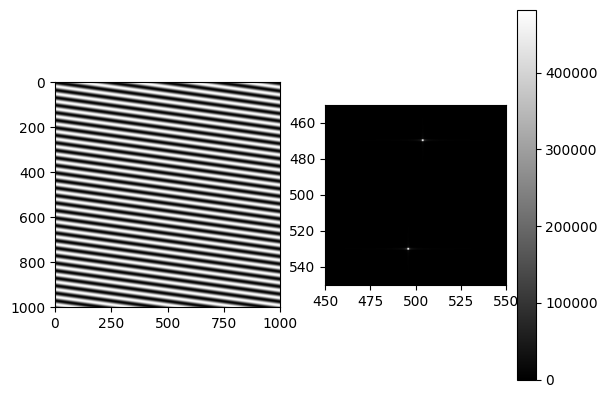

In [57]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(x, x)
wavelength = 33
angle = -np.arctan(29/4)
grating = np.sin(
    2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / wavelength
)
plt.set_cmap("gray")
plt.subplot(121)
plt.imshow(grating)
# Calculate Fourier transform of grating
ft = np.fft.ifftshift(grating)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)
plt.subplot(122)
plt.imshow(abs(ft))
plt.xlim([450, 550])
plt.ylim([550, 450])
plt.colorbar()
plt.show()

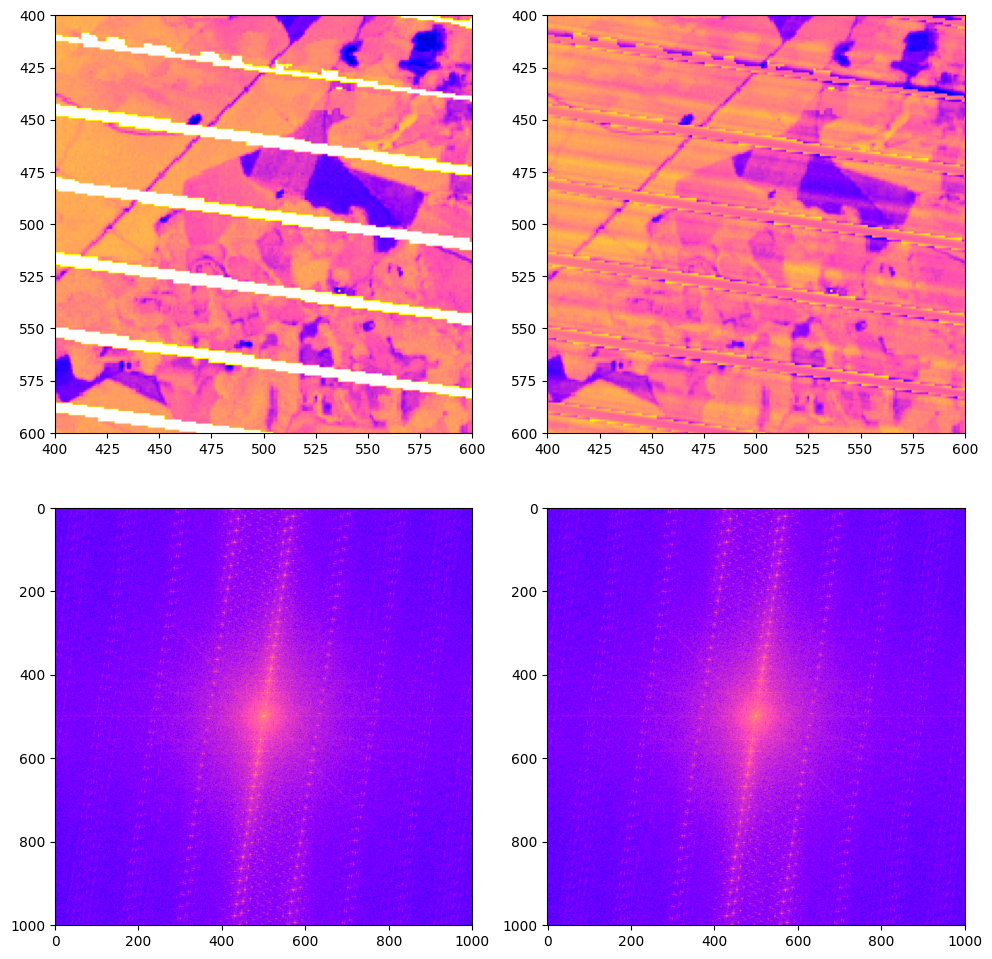

In [200]:
import numpy as np
test_image_with_nan = np.load('test_image_with_nan.npy')

test_image_with_nan[np.isnan(test_image_with_nan)] = 1e4
valid_index = np.argwhere(~np.isnan(test_image_with_nan))[0]  # Get the first non-NaN index
original_value = test_image_with_nan[tuple(valid_index)]

# 30 oscillation in the image
# wavelength = 1000/30 = 33

# Calculate Fourier transform of grating
ft = np.fft.ifftshift(test_image_with_nan)
ft = np.fft.fft2(ft, norm='ortho')
ft = np.fft.fftshift(ft)

ft_filt = ft.copy()
shift = 10
w1_y_m, w1_y_M, w1_x_m, w1_x_M = (493, 499, 525, 531)
w2_y_m, w2_y_M, w2_x_m, w2_x_M = (501, 507, 469, 475)
wc_y_m, wc_y_M, wc_x_m, wc_x_M = (480, 520, 480, 520)
# ft_filt[w1_x_m:w1_x_M, w1_y_m:w1_y_M] = ft_filt[w1_x_m+shift:w1_x_M+shift, w1_y_m+shift:w1_y_M+shift].copy()
# ft_filt[w2_x_m:w2_x_M, w2_y_m:w2_y_M] = ft_filt[w2_x_m+shift:w2_x_M+shift, w2_y_m+shift:w2_y_M+shift].copy()
abs_mean_bad = np.mean(np.abs(ft[w1_x_m:w1_x_M, w1_y_m:w1_y_M]))
mean_good = np.mean(np.abs(ft[w1_x_m+shift:w1_x_M+shift, w1_y_m+shift:w1_y_M+shift]))

indices_to_replace = np.argwhere(np.abs(ft_filt) > abs_mean_bad)
complement_mask = np.abs(ft_filt) <= abs_mean_bad
for index in indices_to_replace:
    y, x = index[0], index[1]
    comp_indices = np.argwhere(complement_mask)
    if comp_indices.size > 0:
        distances = np.sqrt((comp_indices[:, 0] - y) ** 2 + (comp_indices[:, 1] - x) ** 2)
        nearest_index = comp_indices[np.argmin(distances)]  # Get the nearest index
        ft_filt[y, x] = ft_filt[nearest_index[0], nearest_index[1]]

# ft_filt[np.abs(ft_filt) > abs_mean_bad] = mean_good
        
ft_filt[wc_x_m:wc_x_M, wc_y_m:wc_y_M] = ft[wc_x_m:wc_x_M, wc_y_m:wc_y_M].copy()

rec = np.fft.ifftshift(ft_filt)
rec = np.fft.ifft2(rec, norm='ortho')
rec = np.fft.fftshift(rec)
rec = np.real(rec)
# reconstructed_value = rec[tuple(valid_index)]
# rec *= original_value / reconstructed_value

plt_1, plt_2, plt_3, plt_4 = (400, 600, 400, 600)
# plt_1, plt_2, plt_3, plt_4 = (0, 1000, 0, 1000)
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(test_image_with_nan, cmap='gnuplot2')
plt.xlim([plt_1, plt_2])
plt.ylim([plt_4, plt_3])
plt.subplot(222)
plt.imshow(rec, cmap='gnuplot2')
plt.xlim([plt_1, plt_2])
plt.ylim([plt_4, plt_3])

plt.subplot(223)
ft_plt = np.log(np.abs(ft))
ft_plt_min = np.min(ft_plt)
ft_plt_max = np.max(ft_plt)
plt.imshow(ft_plt, cmap='gnuplot2', vmin=ft_plt_min, vmax=ft_plt_max)
## Window down
# plt.xlim([450, 550])
# plt.ylim([550, 450])
# plt.xlim([w1_x_m, w1_x_M])
# plt.ylim([w1_y_M, w1_y_m])

plt.subplot(224)
plt.imshow(np.log(np.abs(ft_filt)), cmap='gnuplot2', vmin=ft_plt_min, vmax=ft_plt_max)
## Window down
# plt.xlim([450, 550])
# plt.ylim([550, 450])
# plt.xlim([w1_x_m, w1_x_M])
# plt.ylim([w1_y_M, w1_y_m])

plt.tight_layout()
plt.show()

In [2]:
import rasterio
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt

test_image_with_nan = np.load('test_image_with_nan.npy')

mask = np.isnan(test_image_with_nan).astype(np.uint8)  # 1 where missing, 0 otherwise

image_filled = np.nan_to_num(test_image_with_nan, nan=0)
start = time.time()
inpainted_image = cv2.inpaint(image_filled, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

print(f"OpenCV time: {(time.time() - start):.2f} segs")

OpenCV time: 4.60 segs


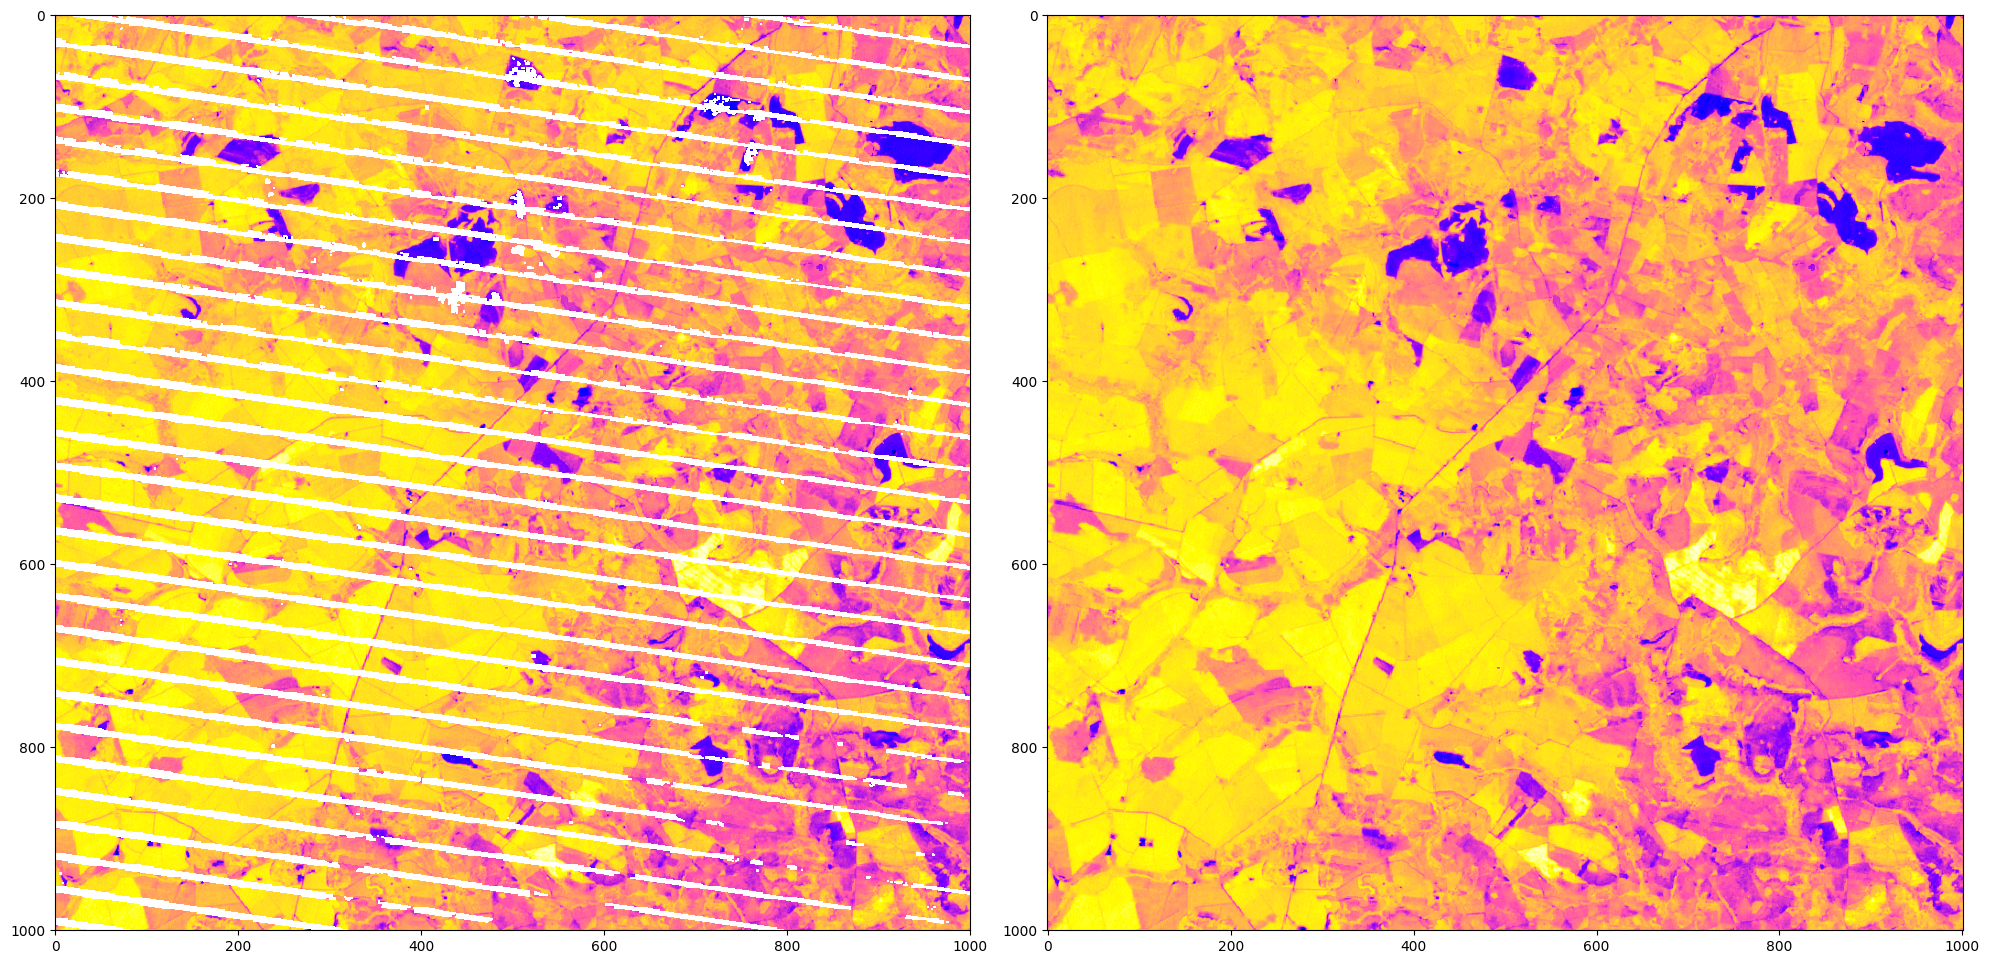

In [7]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(test_image_with_nan, cmap='gnuplot2')
plt.subplot(122)
plt.imshow(inpainted_image, cmap='gnuplot2')
plt.tight_layout()
plt.show()

In [100]:
def process_image_in_chunks(image, chunk_size, inpaint_radius, gap_th, fft_th):
    mask = np.isnan(image).astype(np.uint8)  # 1 where missing, 0 otherwise
    height, width = image.shape
    n_chunk_height = int(np.floor(height/chunk_size))
    n_chunk_width = int(np.floor(width/chunk_size))
    rand_shift_row = random.randint(0, height - chunk_size * n_chunk_height)
    rand_shift_col = random.randint(0, width - chunk_size * n_chunk_width)
    gap_fraq = np.zeros((n_chunk_height, n_chunk_width))
    fft_score = np.zeros((n_chunk_height, n_chunk_width))
    rec_flag = np.zeros((n_chunk_height, n_chunk_width))
    output_image = image.copy()
    
    # Loop through the image by chunks
    for i in range(0, n_chunk_height):
        for j in range(0, n_chunk_width):
            row_start, row_end = (i * chunk_size + rand_shift_row, (i+1) * chunk_size + rand_shift_row)
            col_start, col_end = (j * chunk_size + rand_shift_col, (j+1) * chunk_size + rand_shift_col)
            image_chunk = image[row_start:row_end, col_start:col_end]
            mask_chunk = mask[row_start:row_end, col_start:col_end]
            gap_count_chunk = np.sum(mask_chunk)
            gap_fraq[i, j] = gap_count_chunk/chunk_size/chunk_size
            # Inpaint the chunk
            if gap_fraq[i, j] < gap_th:
                image_filled = np.nan_to_num(image_chunk, nan=0)
                ft = np.fft.ifftshift(image_filled)
                ft = np.fft.fft2(ft, norm='ortho')
                ft = np.fft.fftshift(ft)
                ft[48:80,48:80] = 0
                fft_score[i, j] = np.max(np.abs(ft))
                if fft_score[i, j] > fft_th:
                    inpainted_chunk = cv2.inpaint(image_filled, mask_chunk, inpaintRadius=inpaint_radius, flags=cv2.INPAINT_TELEA)
                    output_image[row_start:row_end, col_start:col_end] = inpainted_chunk
                    rec_flag[i,j] = 1
                    
    return output_image, gap_fraq, fft_score, rec_flag

In [103]:
import rasterio
import cv2
import numpy as np
import skmap_bindings as sb
import random 
year = 2012
n_threads = 96
# Load the image using Rasterio
with rasterio.open(f"data_16days/013E_61N/nir_glad.ard2_m_30m_s_{year}0913_{year}0928_go_epsg.4326_v20240521.tif") as src:
    image = src.read(1).astype(np.float32)  # Reading the first band (change if needed)
with rasterio.open(f"data_16days/013E_61N/qa_mask.ard2_m_30m_s_{year}0913_{year}0928_go_epsg.4326_v20240521.tif") as src:
    qa = src.read(1)  # Reading the first band (change if needed)

############### 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17
gap_mask_old = [1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
gap_mask_new = [1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1]
for k in [0, 3, 4, 7, 8, 9, 10, 255]:
    image[qa == k] = np.nan

chunk_size = 128
start = time.time()
# Apply inpainting using OpenCV (you can also use scikit-image's inpaint_biharmonic)
# Telea or NS methods can be used: 'TELEA' is fast but less accurate for large gaps
fft_th = 2e4
gap_th = 0.35
inpaint_radius = 3
inpainted_image, gap_fraq, fft_score, rec_flag = process_image_in_chunks(image, chunk_size, inpaint_radius, gap_th, fft_th)
print(f"OpenCV time: {(time.time() - start):.2f} segs")


OpenCV time: 1.52 segs


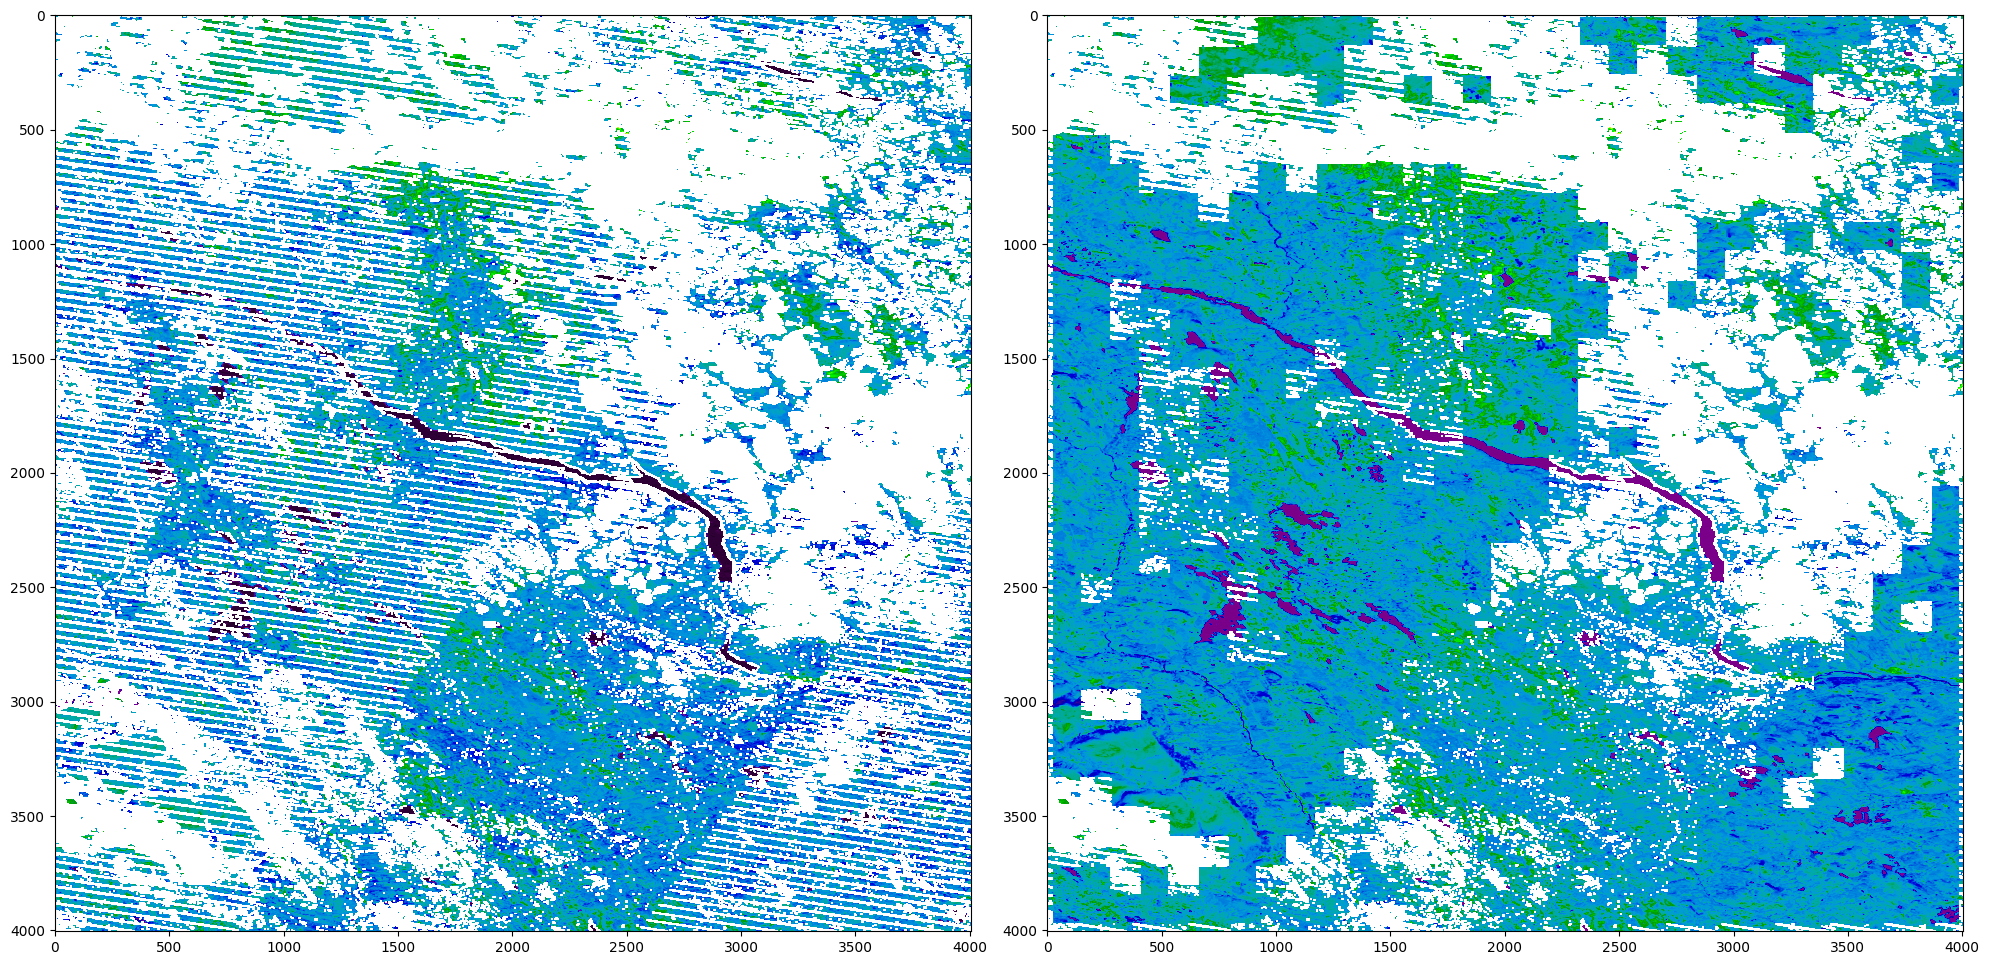

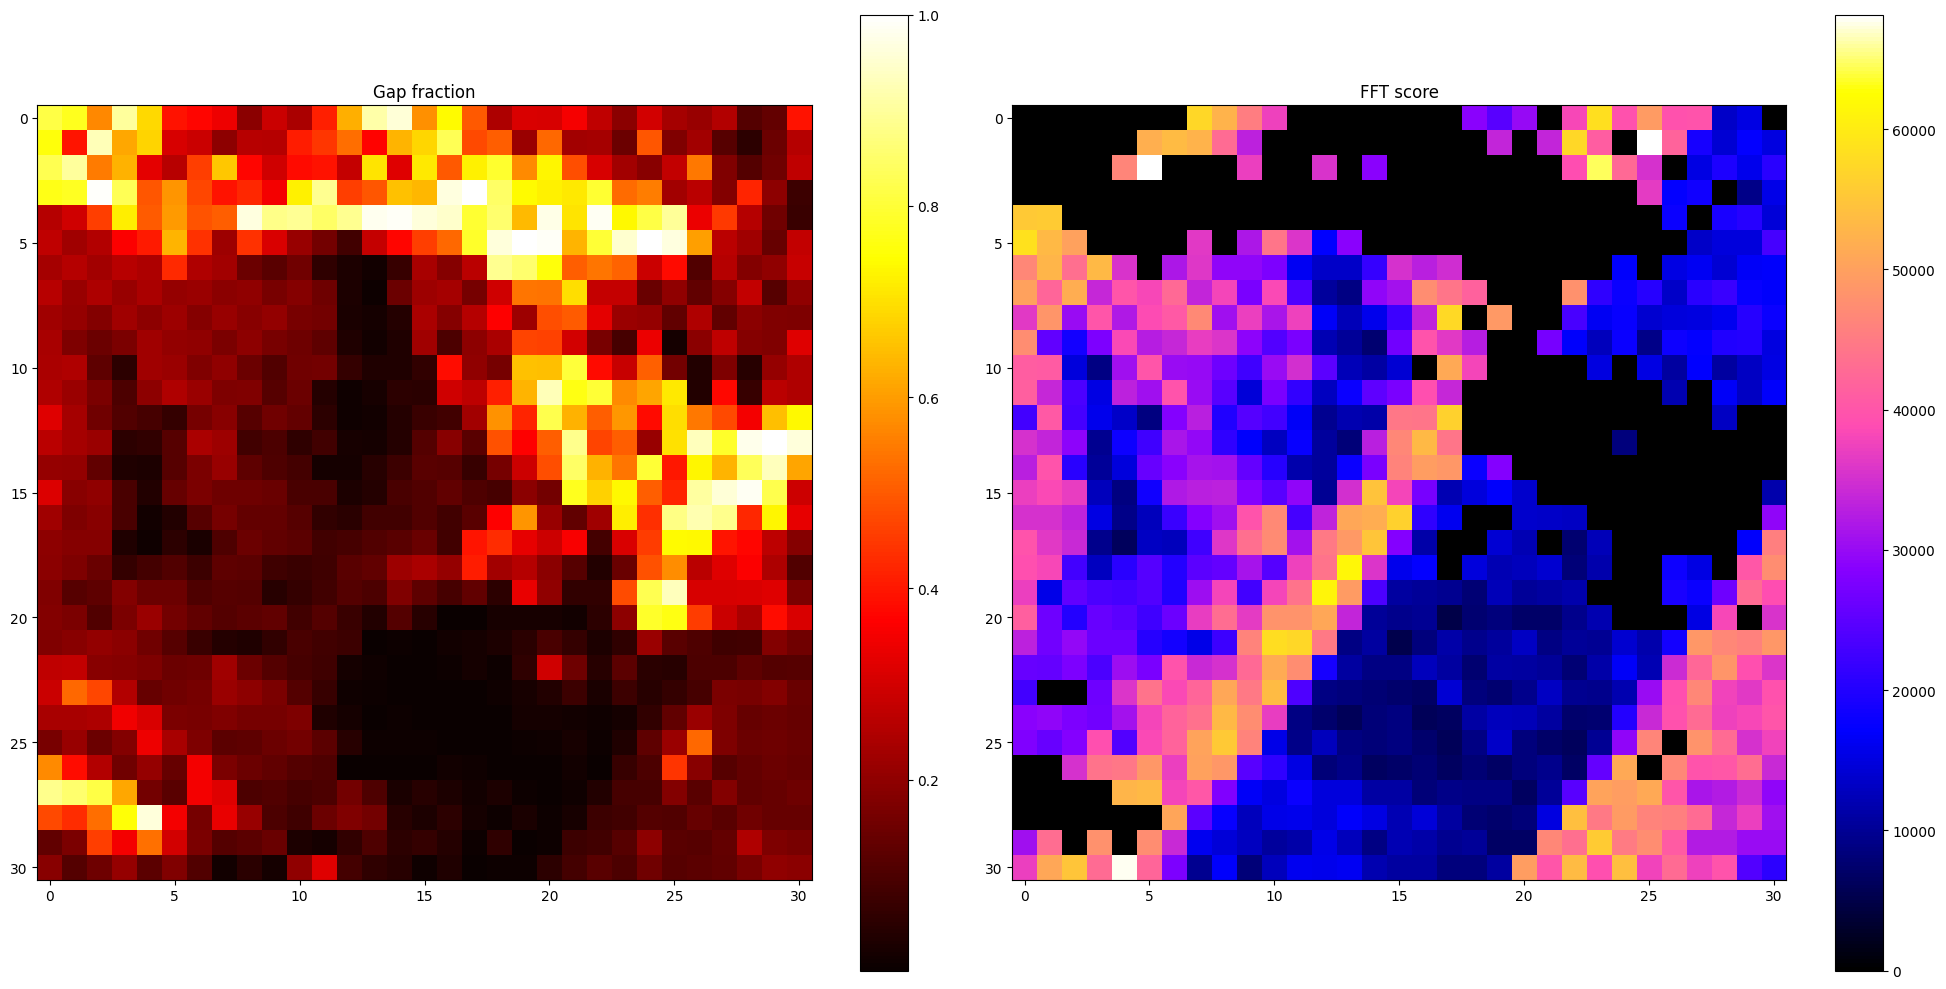

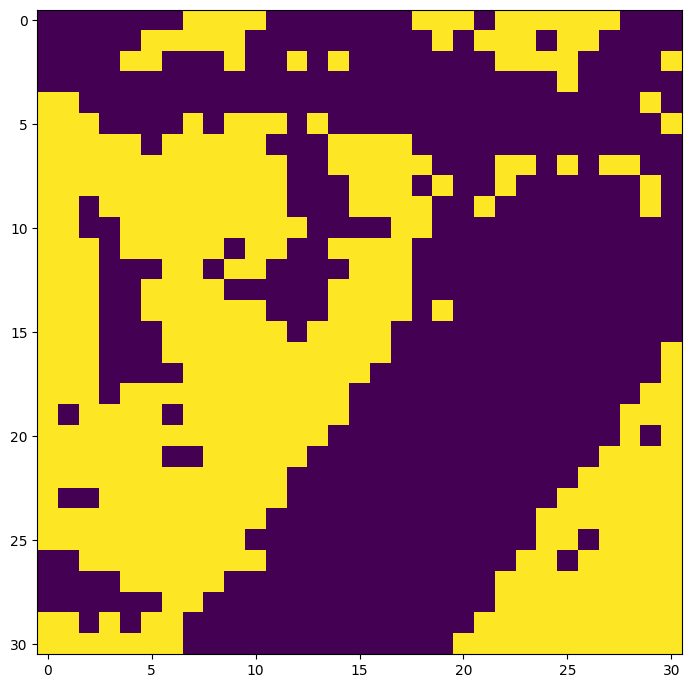

In [105]:
plt.figure(figsize=(20,10))
# plt_1, plt_2, plt_3, plt_4 = (75, 175, 75, 175)
plt_1, plt_2, plt_3, plt_4 = (0, 4004, 0, 4004)
plt.subplot(121)
plt.imshow(image, cmap='nipy_spectral')
plt.xlim([plt_1, plt_2])
plt.ylim([plt_4, plt_3])
plt.subplot(122)
plt.imshow(inpainted_image, cmap='nipy_spectral')
plt.xlim([plt_1, plt_2])
plt.ylim([plt_4, plt_3])
plt.tight_layout()
plt.show()


plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(gap_fraq, cmap='hot')
plt.colorbar()
plt.title("Gap fraction")
plt.subplot(122)
plt.imshow(fft_score, cmap='gnuplot2')
plt.colorbar()
plt.tight_layout()
plt.title("FFT score")
plt.show()

plt.figure(figsize=(7,7))
plt.imshow(rec_flag)
plt.tight_layout()
plt.show()

In [106]:
ft_good_filt[48:80,48:80] = 0
ft_bad_filt[48:80,48:80] = 0
print(f"Good: {np.max(np.abs(ft_good))}, Bad: {np.max(np.abs(ft_bad))}")
print(f"Good filt: {np.max(np.abs(ft_good_filt))}, Bad filt: {np.max(np.abs(ft_bad_filt))}")

Good: 1529324.7421874995, Bad: 1250962.0468749998
Good filt: 6118.885031792281, Bad filt: 57821.2138000027
